# 133.16: 1D finite flow

This notebook shows the Bruggeman solution for:

One dimensional finite flow; given head or drawdown at `x=b` and zero flux at `x=0`.

In [1]:
import matplotlib.pyplot as plt
from numpy import linspace

from bruggeman.flow1d import bruggeman_133_16

In [2]:
bruggeman_133_16

In [3]:
bruggeman_133_16?

Signature:       bruggeman_133_16(*args) -> 'Any'
Type:            LatexifiedFunction
String form:     \begin{array}{l} \beta = \sqrt{ \frac{S}{k D} } \\ b = \frac{L}{2} \\ \varphi(x, t, L, S, k, D, p <...> ht) \pi}{2 \beta b} \mathclose{}\right)^{2} t \mathclose{}\right)}\mathclose{}\right) \end{array}
File:            c:\users\mattijsborst\.conda\envs\cwgi25\lib\site-packages\latexify\ipython_wrappers.py
Docstring:      
Confined aquifer with zero head at x=b(=L/2), zero flux at x=0
and a constant arbitrary precipitation p.

From Bruggeman 133.16

Parameters
----------
x : float or ndarray
    Distance from the boundary [m]
t : float or ndarray
    Time [d]
L : float
    Length of the aquifer [m]
S : float
    Storage coefficient [-]
k : float
    Hydraulic conductivity [m/d]
D : float
    Aquifer thickness [m]
p : float
    Arbitrary constant precipitation [m/d]
N : int
    Number of terms in the series expansion to approximate the infinite sum,
    by default 10 [-]

Returns
------

## Subdivision b: Confined aquifers with zero head at `x=b`

In [5]:
# aquifer parameters
L = 100.0
S = 0.1
k = 10.0
D = 5.0
p = 1e-3  # constant precipitation flux

In [ ]:
t = linspace(0.0, 10.0, 100)
hx0 = bruggeman_133_16(0.0, t, L, S, k, D, p)
hxL4 = bruggeman_133_16(L / 4, t, L, S, k, D, p)

plt.figure(figsize=(8, 3), layout="tight")
plt.plot(t, hx0, label="x=0")
plt.plot(t, hxL4, label="x=L/4")
plt.grid(True)
plt.xlabel("Time (d)")
plt.ylabel("Head (m)")
plt.title("Bruggeman 133.16")
plt.xlim(t[0], t[-1])
plt.ylim(0.0)
plt.legend()

This equation can be used to model drainage to drains and canals. 

Results are equal to Krayenhoff van de Leur - Maasland (e.g.: 'Cultuurtechnisch Vademecum', 1988, page 523).

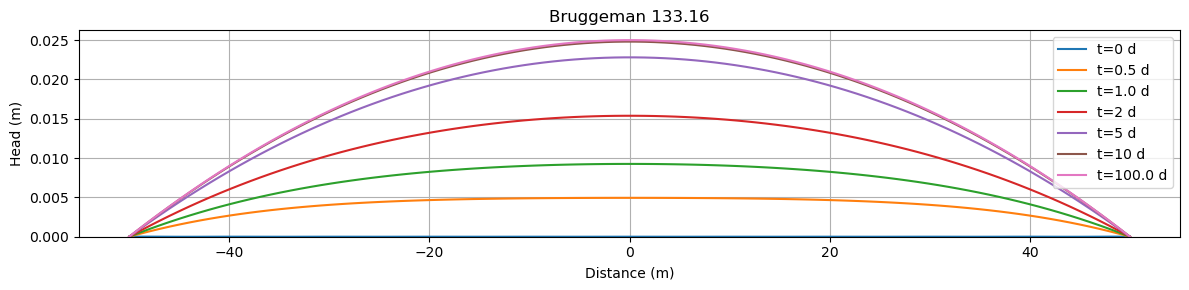

In [7]:
x = linspace(-L / 2, L / 2, 100)
t_steps = [0, 0.5, 1.0, 2, 5, 10, 100.0]  # time steps in days

fig, ax = plt.subplots(figsize=(12, 3), layout="tight")
for t in t_steps:
    ht = bruggeman_133_16(x, t, L, S, k, D, p)
    ax.plot(x, ht, label=f"t={t} d")

ax.grid(True)
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Head (m)")
ax.set_title("Bruggeman 133.16")
ax.set_ylim(0.0)
ax.legend()
